In [133]:
# Install libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [134]:
# Load files Into pandas DataFrame

path = "Data_Files/Item_Sales.csv"
path2 = "Data_Files/Monthly_Sales.csv"

Item_Sales_df = pd.read_csv(path)
Monthly_Sales_df = pd.read_csv(path2)

Item_Sales_df.head()

,Product Type,Net Quantity,Gross Sales,Discounts,Returns,Total Net Sales
0,Art & Sculpture,34,14935.0,-594.00,-1609.0,12732.00
1,Basket,13,3744.0,-316.80,0.0,3427.20
2,Basket,12,3825.0,-201.60,-288.0,3335.40
3,Basket,17,3035.0,-63.25,0.0,2971.75
4,Art & Sculpture,47,2696.8,-44.16,0.0,2652.64


In [135]:
Monthly_Sales_df.head()

,Month,Year,Total Orders,Gross Sales,Discounts,Returns,Net Sales,Shipping,Total Sales
0,January,2017,73,8861.5,-129.40,-448.45,8283.65,1088.30,9371.95
1,February,2017,56,6908.5,-104.70,-416.20,6387.60,892.45,7280.05
2,March,2017,60,5778.5,-172.20,-1017.20,4589.10,707.43,5296.53
3,April,2017,70,8814.0,-281.40,0.00,8532.60,1068.30,9600.90
4,May,2017,54,6677.0,-185.75,-253.80,6237.45,866.46,7103.91


### Inital Check of Monthly Sales 

In [136]:
Monthly_Sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Month         36 non-null     object 
 1   Year          36 non-null     int64  
 2   Total Orders  36 non-null     int64  
 3   Gross Sales   36 non-null     float64
 4   Discounts     36 non-null     float64
 5   Returns       36 non-null     float64
 6   Net Sales     36 non-null     float64
 7   Shipping      36 non-null     float64
 8   Total Sales   36 non-null     float64
dtypes: float64(6), int64(2), object(1)
memory usage: 2.7+ KB


- No Nulls
- All Dtypes seem to be in the correct type.

### Let categorise by year to do an inital check of the data 

In [137]:
# Make a Copy of original dataset 
Sales_Month_df_1= Monthly_Sales_df.copy()
# Set Index to Month and Year
Sales_Month_df = Sales_Month_df_1.set_index(keys=["Month","Year"])
# Display 5 rows of dataframe
Sales_Month_df.head()

,,Total Orders,Gross Sales,Discounts,Returns,Net Sales,Shipping,Total Sales
Month,Year,,,,,,,
January,2017,73,8861.5,-129.40,-448.45,8283.65,1088.30,9371.95
February,2017,56,6908.5,-104.70,-416.20,6387.60,892.45,7280.05
March,2017,60,5778.5,-172.20,-1017.20,4589.10,707.43,5296.53
April,2017,70,8814.0,-281.40,0.00,8532.60,1068.30,9600.90
May,2017,54,6677.0,-185.75,-253.80,6237.45,866.46,7103.91


In [138]:
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


# Sory Dataframe by Month 
Sales_Month_df_1["Month"] = pd.Categorical(Sales_Month_df_1["Month"], categories=new_order, ordered=True)


# Let visualise each column against the Month and Year

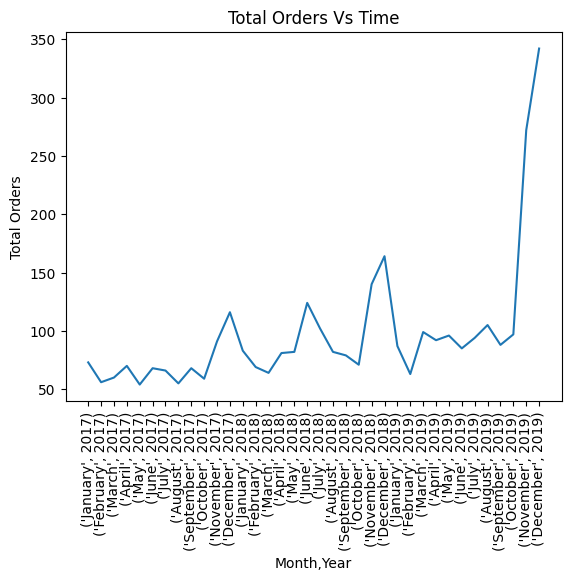

In [139]:
# Plot graph for Total Orders

ax = Sales_Month_df["Total Orders"].plot()

#Show all X ticks on graph
ax.set_xticks(range(len(Sales_Month_df)))
# Rotate X axis label to vertial
# plt.xticks(rotation=90, alpha=0.5)
ax.set_xticklabels([item for item in Sales_Month_df.index.tolist()], rotation=90)
ax.set_ylabel("Total Orders")
ax.set_title("Total Orders Vs Time")
plt.show()


In [156]:
# Let write a function to graph the columns against time.

def Month_Graph(df, column):
    Df = df
    Column_Name = column

    # Pivot the table based on month and year then use column values to fill in 
    pt = df.pivot(index="Month", columns="Year", values = f"{Column_Name}")
    # Plot graph 
    ax = pt.plot()
    
    #Show all X ticks on graph
    ax.set_xticks(range(len(pt)))
    
    # Rotate X axis label to vertial
    plt.xticks(rotation=90, alpha=0.5)
    ax.set_xticklabels(pt.index.tolist(), rotation=90)
    ax.set_ylabel(f"{Column_Name}")
    ax.set_title(f"{Column_Name} Vs Time")
    ax.legend()
    
    plt.show()

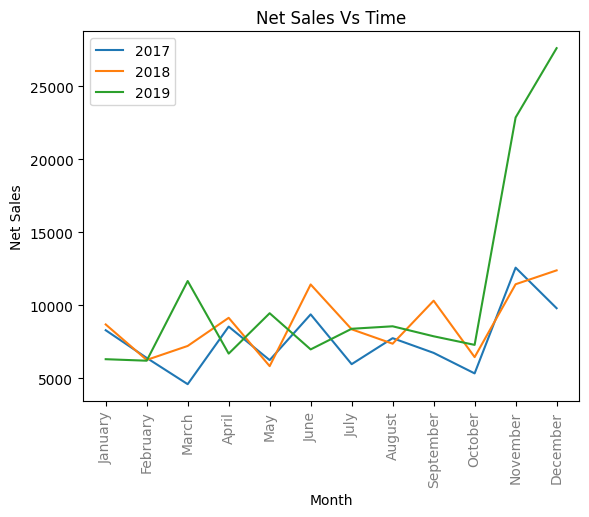

In [157]:
# Graph Net Sales for each year
Month_Graph(Sales_Month_df_1,"Net Sales")

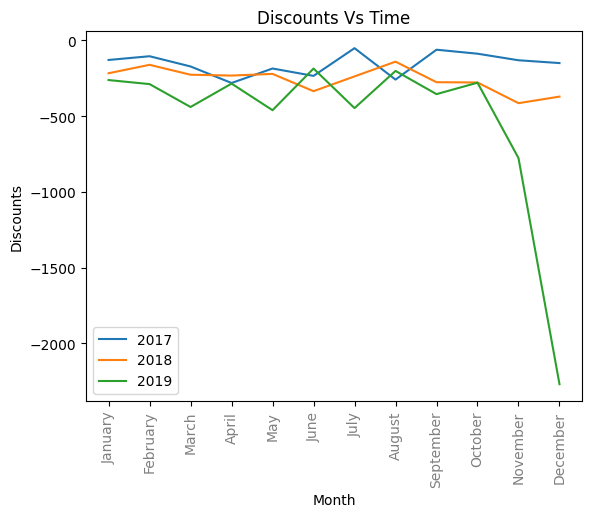

In [160]:
Month_Graph(Sales_Month_df_1,"Discounts")

In [ ]:

ax = Sales_Month_df[["Discounts","Total Sales", "Returns"]].plot()

#Show all X ticks on graph
ax.set_xticks(range(len(Sales_Month_df)))
# Rotate X axis label to vertial
# plt.xticks(rotation=90, alpha=0.5)
ax.set_xticklabels([item for item in Sales_Month_df.index.tolist()], rotation=90)
ax.set_ylabel("Money")
ax.set_title("Total Orders Vs Time")
plt.show()